**Import relevant libraries**

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

pd.options.display.max_columns = None
pd.options.display.max_colwidth = 100

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

**Reading the csv data and storing it in raw_data DataFrame.**

In [114]:
raw_data = pd.read_csv('Parkinson_disease.csv')
raw_data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


**Generate descriptive statistics of the raw_data DataFrame**

In [115]:
raw_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [116]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [117]:
raw_data.shape

(195, 24)

**Checking unique values in 'status' column**

In [118]:
raw_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

**Removing 'name' column for raw_data dataframe.**

In [119]:
df = raw_data.drop(['name'], axis=1)

In [127]:
# Group by 'status' and calculate mean
grouped_data = df.groupby(['status']).mean()
grouped_data


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Scaling the data using StandardScaler**

In [121]:
scaler = StandardScaler()

X = df.drop(['status'], axis=1)
X = scaler.fit_transform(X)

y = df['status']

**Dividing data to train and test.**

In [122]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(156, 22) (39, 22) (156,) (39,)


**Create a Logistic regression model instance and train it on training data.**

In [124]:
reg = LogisticRegression()

reg.fit(train_x, train_y)

LogisticRegression()

**Accuracy of model on training data.**

In [125]:
reg.score(train_x, train_y)

0.8653846153846154

**Applying model on test data and calculating accuracy.**

In [126]:
predictions = reg.predict(test_x)

reg_score_test = reg.score(test_x, test_y)
print(f"Test set accuracy: {reg_score_test:.2f}")

Test set accuracy: 0.90


**SVC**

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

**Initialize a Support Vector Classifier (SVC) model**

In [130]:
model = SVC()

**Fit training data into the model**

In [131]:
model.fit(train_x, train_y)


SVC()

**Predict on training data**

In [133]:
pred_train = model.predict(train_x)

**Print training accuracy**

In [134]:
print(f"Train set accuracy: {accuracy_score(train_y, pred_train):.2f}")

Train set accuracy: 0.89


**Confusion matrix for training data**

In [136]:
train_confusion_matrix = confusion_matrix(train_y, pred_train)
print(train_confusion_matrix)

[[ 24  17]
 [  0 115]]


**Predict on test data**

In [137]:
pred_test = model.predict(test_x)

**Print testing accuracy**

In [138]:
print(f"Test set accuracy: {accuracy_score(test_y, pred_test):.2f}")

Test set accuracy: 0.90


**Confusion matrix for testing data**

In [139]:
test_confusion_matrix = confusion_matrix(test_y, pred_test)
print(test_confusion_matrix)

[[ 3  4]
 [ 0 32]]


**Retrieve and display model coefficients**

In [141]:
coefficients = reg.coef_
coefficients

array([[-0.45778274, -0.37966936, -0.12938086, -0.4378546 , -0.61012059,
         0.5628099 ,  0.0585771 ,  0.56158957,  0.15202644,  0.11365592,
        -0.33223257,  0.39064008,  0.65869741, -0.33331887, -0.19170903,
         0.07198097, -0.44403798,  0.10651255,  0.79482719,  0.44760496,
         0.828856  ,  1.13414209]])

**Bar chart of coefficients sorted in descending order**

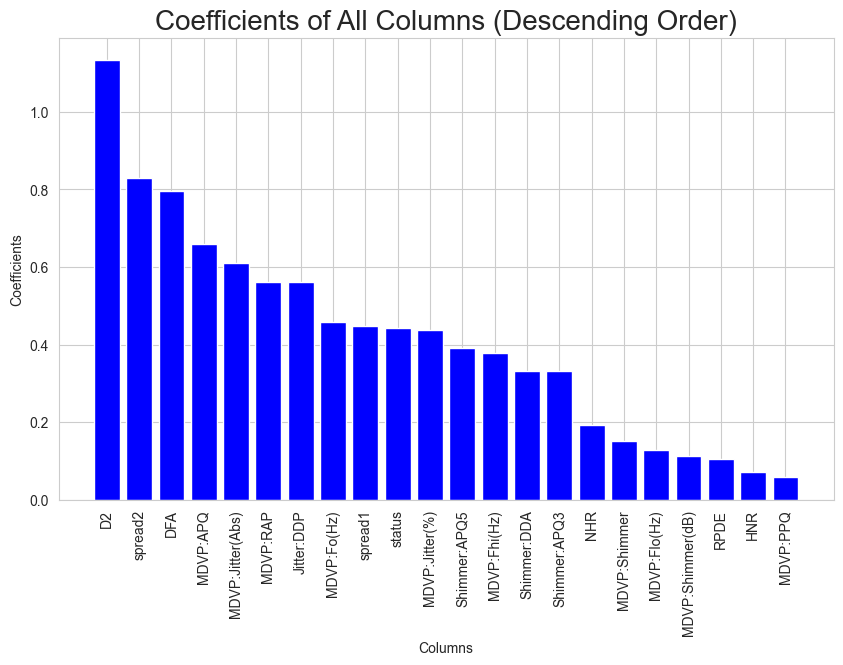

In [165]:
# Get the column names and corresponding coefficients
column_names = df.columns
coefficients = abs(reg.coef_[0])

# Sort the coefficients and column names in descending order
sorted_indices = coefficients.argsort()[::-1] # argsort returns the indices that would sort an array
sorted_coefficients = coefficients[sorted_indices]
sorted_column_names = column_names[sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_column_names, sorted_coefficients, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Coefficients')
plt.title('Coefficients of All Columns (Descending Order)', fontsize=20)
plt.show()